In [149]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from astropy.time import Time

import pypistats

def stats(package_name): 
    return pypistats.overall(package_name, total=True, 
                             format="pandas").groupby("category").get_group(
                             "without_mirrors").sort_values("date")#.set_index('date')
names = sorted(['astroplan', 'astroquery', 'photutils', 'specutils', 'glue', 
                'stingray', 'ccdproc', 'astroML', 'astro-gala', 'ginga', 'synphot'])
dfs = [stats(name) for name in names]

In [150]:
for df in dfs: 
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')

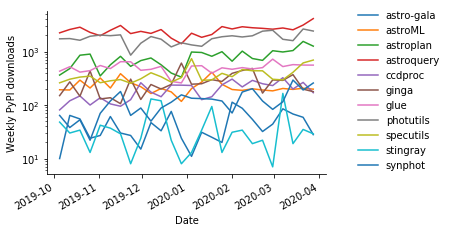

In [152]:
fig, ax = plt.subplots(figsize=(5, 3))
for data, name in zip(dfs, names): 
    
    resampled = data.set_index('date').resample('7 d').sum()
    
    ax.plot_date(Time([str(i) for i in resampled.index.values], format='isot').plot_date, 
                 resampled["downloads"], '-', label=name)
ax.set_yscale('log')
ax.set(ylabel='Weekly PyPI downloads', xlabel='Date')
ax.legend(loc=(1.1, 0.), frameon=False)

for sp in ['right', 'top']:
    ax.spines[sp].set_visible(False)

plt.setp(ax.get_xticklabels(), ha='right', rotation=30)
    
fig.savefig('affiliated.png', bbox_inches='tight', dpi=300)